In [1]:
pip install opencv-python scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


# 1. K-Means Clustering for Image Segmentation

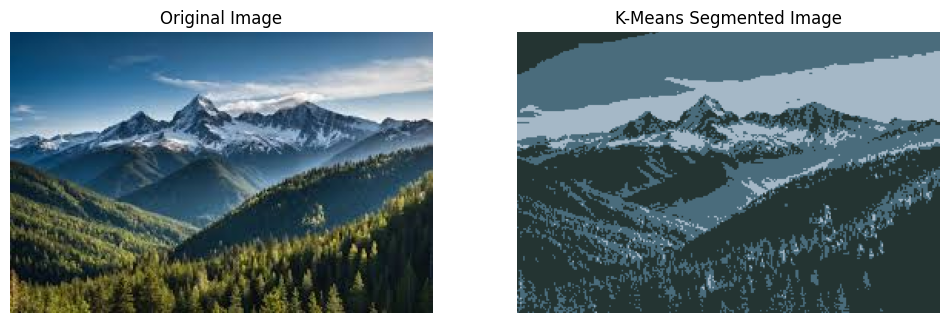

In [3]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load image
image = cv2.imread('C:/Users/SURI R/Desktop/clustering image 1.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Reshaping the image to a 2D array of pixels
pixels = image.reshape((-1, 3))

# Applying KMeans clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(pixels)

# Assigning labels
segmented_image = kmeans.cluster_centers_[kmeans.labels_]
segmented_image = segmented_image.reshape(image.shape)

# Display original and segmented images side by side
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')  # Hide axis

# Segmented image
plt.subplot(1, 2, 2)
plt.imshow(segmented_image.astype('uint8'))
plt.title('K-Means Segmented Image')
plt.axis('off')  # Hide axis

# Show the plot
plt.show()


# 2. Mean Shift Clustering for Image Segmentation

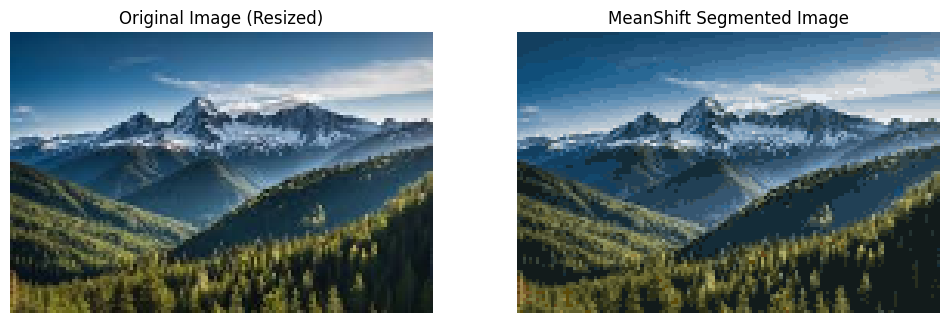

In [1]:
import cv2
import numpy as np
from sklearn.cluster import MeanShift
import matplotlib.pyplot as plt

# Load image
image = cv2.imread('C:/Users/SURI R/Desktop/clustering image 1.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Optional: Downsample the image to speed up processing (resize to half)
image_resized = cv2.resize(image, (image.shape[1] // 2, image.shape[0] // 2))

# Reshaping the image to a 2D array of pixels
pixels = image_resized.reshape((-1, 3))

# Optional: Reduce the bandwidth to speed up clustering
mean_shift = MeanShift(bandwidth=10)  # Try smaller bandwidth values
mean_shift.fit(pixels)

# Assigning labels
segmented_image = mean_shift.cluster_centers_[mean_shift.labels_]
segmented_image = segmented_image.reshape(image_resized.shape)

# Display original and MeanShift segmented images side by side
plt.figure(figsize=(12, 6))

# Original image (resized)
plt.subplot(1, 2, 1)
plt.imshow(image_resized)
plt.title('Original Image (Resized)')
plt.axis('off')  # Hide axis

# MeanShift segmented image
plt.subplot(1, 2, 2)
plt.imshow(segmented_image.astype('uint8'))
plt.title('MeanShift Segmented Image')
plt.axis('off')  # Hide axis

# Show the plot
plt.show()


# 3. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

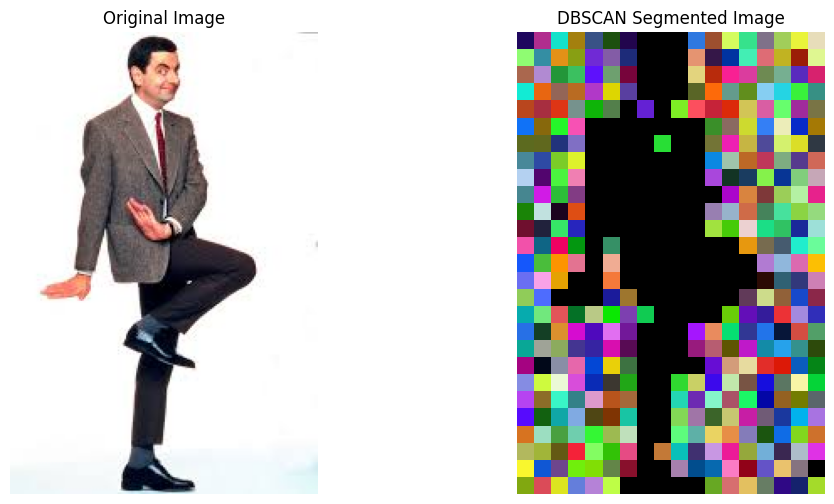

In [56]:
import cv2
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Load image
image = cv2.imread('C:/Users/SURI R/Desktop/clustering image 4.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Resize the image to reduce memory usage (optional, but recommended)
resize_factor = 0.1  # Resize the image to 10% of its original size
new_width = int(image.shape[1] * resize_factor)
new_height = int(image.shape[0] * resize_factor)
resized_image = cv2.resize(image, (new_width, new_height))

# Reshaping the resized image to a 2D array of pixels
pixels = resized_image.reshape((-1, 3))

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=15, min_samples=50)  # eps is the neighborhood size, min_samples is the minimum number of points to form a cluster
labels = dbscan.fit_predict(pixels)

# Create segmented image (assigning a unique color to each cluster)
segmented_image = np.zeros_like(resized_image)
for i in range(len(labels)):
    if labels[i] != -1:  # DBSCAN assigns -1 for noise
        segmented_image.reshape((-1, 3))[i] = np.random.randint(0, 255, 3)  # Assign random color to clusters
    else:
        segmented_image.reshape((-1, 3))[i] = [0, 0, 0]  # Noise points can be black

# Display both original and clustered images
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')  # Hide axis

# Display segmented image
plt.subplot(1, 2, 2)
plt.imshow(segmented_image.astype('uint8'))
plt.title('DBSCAN Segmented Image')
plt.axis('off')  # Hide axis

# Show the plot
plt.show()


# 4. Gaussian Mixture Model (GMM) for Image Segmentation


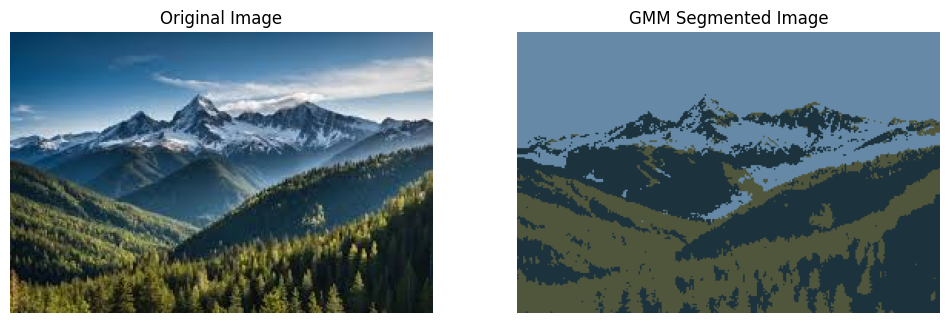

In [1]:
import cv2
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Load image
image = cv2.imread('C:/Users/SURI R/Desktop/clustering image 1.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Reshaping the image to a 2D array of pixels
pixels = image.reshape((-1, 3))

# Applying Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=3)
gmm.fit(pixels)

# Predicting labels
labels = gmm.predict(pixels)
segmented_image = gmm.means_[labels]

# Reshaping the segmented image back to the original shape
segmented_image = segmented_image.reshape(image.shape)

# Display original and GMM segmented images side by side
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')  # Hide axis

# Segmented image
plt.subplot(1, 2, 2)
plt.imshow(segmented_image.astype('uint8'))
plt.title('GMM Segmented Image')
plt.axis('off')  # Hide axis

# Show the plot
plt.show()


# 5. Watershed Algorithm for Image Segmentation (Using K-means for preprocessing)

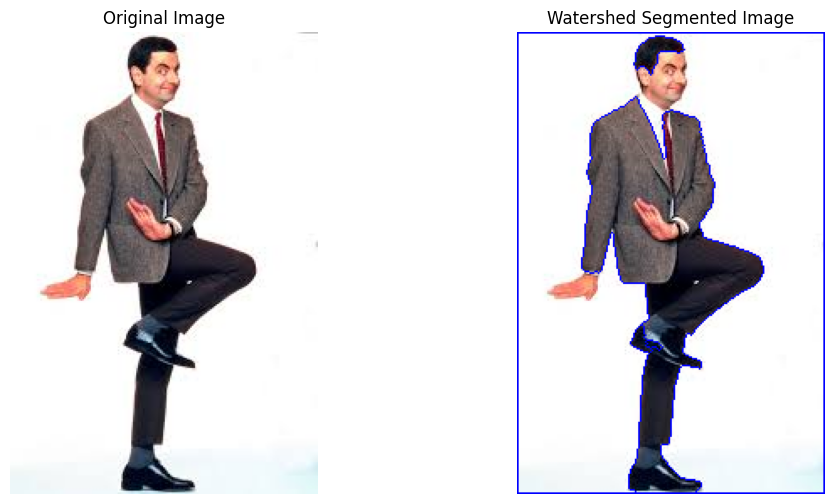

In [81]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
image = cv2.imread('C:/Users/SURI R/Desktop/clustering image 4.jpeg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for proper display in matplotlib

# Convert to grayscale
gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

# Thresholding the image
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Finding sure regions
sure_bg = cv2.dilate(thresh, None, iterations=3)
sure_fg = cv2.erode(thresh, None, iterations=3)

# Unknown region
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Apply Watershed
image_copy = image_rgb.copy()
markers = markers + 1
markers[unknown == 255] = 0

cv2.watershed(image_copy, markers)
image_copy[markers == -1] = [0, 0, 255]  # Boundary of regions

# Display both original and segmented images
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')  # Hide axis

# Segmented image (after applying watershed)
plt.subplot(1, 2, 2)
plt.imshow(image_copy)
plt.title('Watershed Segmented Image')
plt.axis('off')  # Hide axis

# Show the plot
plt.show()


# 6. Agglomerative Clustering for Image Segmentation

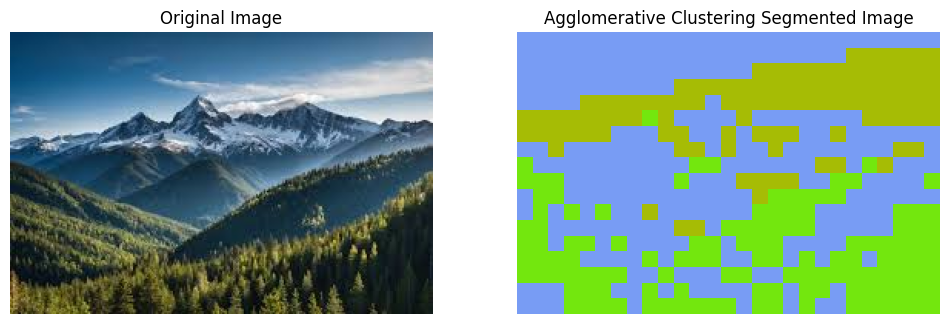

In [62]:
import cv2
import numpy as np
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('C:/Users/SURI R/Desktop/clustering image 1.jpeg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for better display in matplotlib

# Resize the image to reduce memory usage (optional but recommended for large images)
resize_factor = 0.1  # Resize the image to 10% of its original size for segmentation
new_width = int(image.shape[1] * resize_factor)
new_height = int(image.shape[0] * resize_factor)
resized_image = cv2.resize(image_rgb, (new_width, new_height))

# Reshape the resized image to a 2D array of pixels (each pixel has 3 values: RGB)
pixels = resized_image.reshape((-1, 3))

# Apply Agglomerative Clustering
agg_clust = AgglomerativeClustering(n_clusters=3)  # Set the number of clusters
labels = agg_clust.fit_predict(pixels)

# Create a blank image for the segmented result
segmented_image = np.zeros_like(resized_image)

# Create a color palette for the clusters
colors = np.random.randint(0, 255, size=(3, 3))  # 3 clusters, each with 3 RGB values

# Assigning cluster colors
for i in range(len(labels)):
    segmented_image.reshape((-1, 3))[i] = colors[labels[i]]

# Display both original and segmented images
plt.figure(figsize=(12, 6))

# Original image (full size, RGB)
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)  # Display the original image in RGB
plt.title('Original Image')
plt.axis('off')  # Hide axis

# Segmented image (resized version for better clarity)
plt.subplot(1, 2, 2)
plt.imshow(segmented_image.astype('uint8'))  # Show segmented image
plt.title('Agglomerative Clustering Segmented Image')
plt.axis('off')  # Hide axis

# Show the plot
plt.show()
